In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split

import numpy as np


In [2]:
import os

import cv2

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.layers import InputLayer,Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization,Resizing, Rescaling

from tensorflow.keras.layers import RandomRotation, RandomFlip, RandomContrast, RandomZoom, GaussianNoise

from tensorflow.keras.regularizers import L2

from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy



import tensorflow_probability as tfp




In [3]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:16<00:00, 156MB/s]
100% 2.29G/2.29G [00:16<00:00, 147MB/s]


In [5]:
!unzip /content/chest-xray-pneumonia.zip -d /content/data


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
 

In [6]:
train_directory = '/content/data/chest_xray/train'
validation_directory = '/content/data/chest_xray/val'
test_directory = '/content/data/chest_xray/test'


In [7]:
CLASS_NAMES=['NORMAL', 'PNEUMONIA']

In [8]:
CONFIGURATION= {

    "BATCH_SIZE": 32,

    "IM_SIZE": 256,

    "LEARNING_RATE":0.001,

    "N_EPOCHS":20,

    "DROPOUT_RATE":0.1,

    "REGULARIZATION_RATE":0.001,

    "N_FILTERS":6,

    "KERNEL_SIZE":3,

    "N_STRIDES":1,

    "POOL_SIZE":2,

    "N_DENSE_1":100,

    "N_DENSE_2":10,

    "NUM_CLASSES":2,



}

In [9]:
train_dataset= tf.keras.preprocessing.image_dataset_from_directory(

    train_directory,

    labels='inferred',

    label_mode='categorical', # ex: 0,0,1 called one-hot encoding

    class_names=CLASS_NAMES,

    color_mode='rgb',

    batch_size=CONFIGURATION["BATCH_SIZE"],

    image_size=(256, 256),

    shuffle=True,

    seed=99,

    validation_split=None,



)




Found 5216 files belonging to 2 classes.


In [10]:
validation_dataset= tf.keras.preprocessing.image_dataset_from_directory(

    validation_directory,

    labels='inferred',

    label_mode='categorical', # ex: 0,0,1 called one-hot encoding

    class_names=CLASS_NAMES,

    color_mode='rgb',

    batch_size=CONFIGURATION["BATCH_SIZE"],

    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),

    shuffle=True,

    seed=99, #Spicified it to alweys same shuffling



)

Found 16 files belonging to 2 classes.


In [11]:
test_dataset= tf.keras.preprocessing.image_dataset_from_directory(

    test_directory,

    labels='inferred',

    label_mode='categorical', # ex: (0,0,1) called one-hot encoding, many traditional neural network architectures are designed to work with one-hot encoded vectors.

    class_names=CLASS_NAMES,

    color_mode='rgb',

    batch_size=CONFIGURATION["BATCH_SIZE"],

    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),

    shuffle=True,

    seed=99, #Spicified it to alweys same shuffling



)




Found 624 files belonging to 2 classes.


In [12]:
for i in validation_dataset.take(1):

    print(i)




(<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [5.42255859e+01, 5.42255859e+01, 5.42255859e+01],
         [9.62978516e+01, 9.62978516e+01, 9.62978516e+01],
         [1.29635742e+02, 1.29635742e+02, 1.29635742e+02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [5.33486328e+01, 5.33486328e+01, 5.33486328e+01],
         [8.24257812e+01, 8.24257812e+01, 8.24257812e+01],
         [1.35265625e+02, 1.35265625e+02, 1.35265625e+02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         

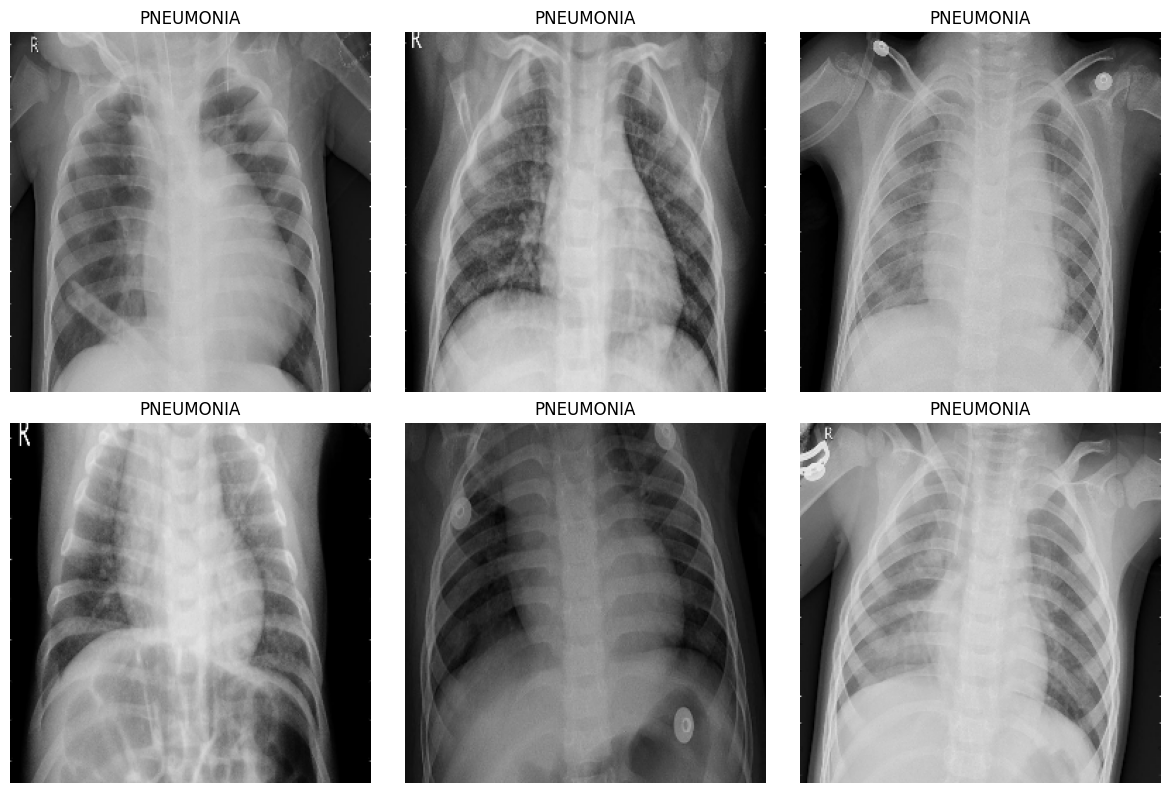

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels from the dataset
images, labels = next(iter(train_dataset))

# Set the number of images to display
num_images = 6

# Define class names (assuming CLASS_NAMES is already defined)
class_names = CLASS_NAMES

# Create a figure to display the images
plt.figure(figsize=(12, 8))

# Loop through the first 6 images
for i in range(num_images):
    # Create a subplot for each image
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # Convert image to displayable format
    plt.title(class_names[np.argmax(labels[i])])  # Show label of the image
    plt.axis("off")  # Hide axes for a cleaner look

# Show the plot
plt.tight_layout()
plt.show()


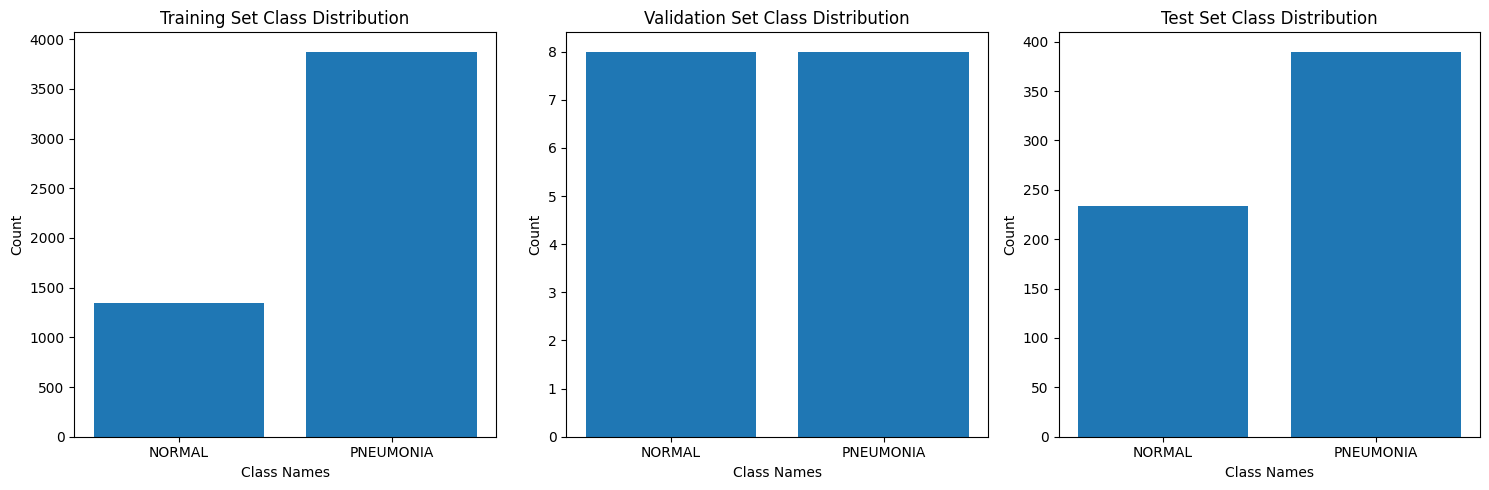

In [14]:
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf



# Define a function to calculate the distribution of classes

def get_class_distribution(dataset, class_names):

    class_counts = np.zeros(len(class_names))

    for images, labels in dataset:

        class_counts += np.sum(labels, axis=0)

    return class_counts



# Get class distributions for training, validation, and test datasets

train_class_counts = get_class_distribution(train_dataset, CLASS_NAMES)

validation_class_counts = get_class_distribution(validation_dataset, CLASS_NAMES)

test_class_counts = get_class_distribution(test_dataset, CLASS_NAMES)



# Plot the class distributions

plt.figure(figsize=(15, 5))



plt.subplot(1, 3, 1)

plt.bar(CLASS_NAMES, train_class_counts)

plt.title('Training Set Class Distribution')

plt.xlabel('Class Names')

plt.ylabel('Count')



plt.subplot(1, 3, 2)

plt.bar(CLASS_NAMES, validation_class_counts)

plt.title('Validation Set Class Distribution')

plt.xlabel('Class Names')

plt.ylabel('Count')



plt.subplot(1, 3, 3)

plt.bar(CLASS_NAMES, test_class_counts)

plt.title('Test Set Class Distribution')

plt.xlabel('Class Names')

plt.ylabel('Count')



plt.tight_layout()

plt.show()

In [15]:
from sklearn.utils.class_weight import compute_class_weight

import numpy as np



class_labels = np.array([0, 1])



training_class_distribution = {

    0: 1341,  # NORMAL

    1: 3875   # PNEUMONIA

}



class_weights = compute_class_weight(

    class_weight='balanced',

    classes=class_labels,

    y=[0]*1341 + [1]*3875

)



class_weights_dict = dict(enumerate(class_weights))



print("Class Weights:", class_weights_dict)


Class Weights: {0: 1.9448173005219984, 1: 0.6730322580645162}


In [16]:
def resize_rescale(image,label):

    return tf.image.resize(image,(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]))/255.0,label



augment_layers = tf.keras.Sequential([

    tf.keras.layers.RandomRotation((-0.025, 0.025)),

    tf.keras.layers.GaussianNoise(0.1),

    tf.keras.layers.RandomContrast(factor=0.2),

    tf.keras.layers.RandomZoom(0.2),

    tf.keras.layers.RandomBrightness(0.2)

])

In [17]:
def augment_layer(image,label):

    return augment_layers(image,training=True),label

In [18]:
training_dataset=(

train_dataset

.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)

.prefetch(tf.data.AUTOTUNE)

)



val_datset=(

validation_dataset

.prefetch(tf.data.AUTOTUNE)

)



testing_datset=(

test_dataset

.prefetch(tf.data.AUTOTUNE)

)




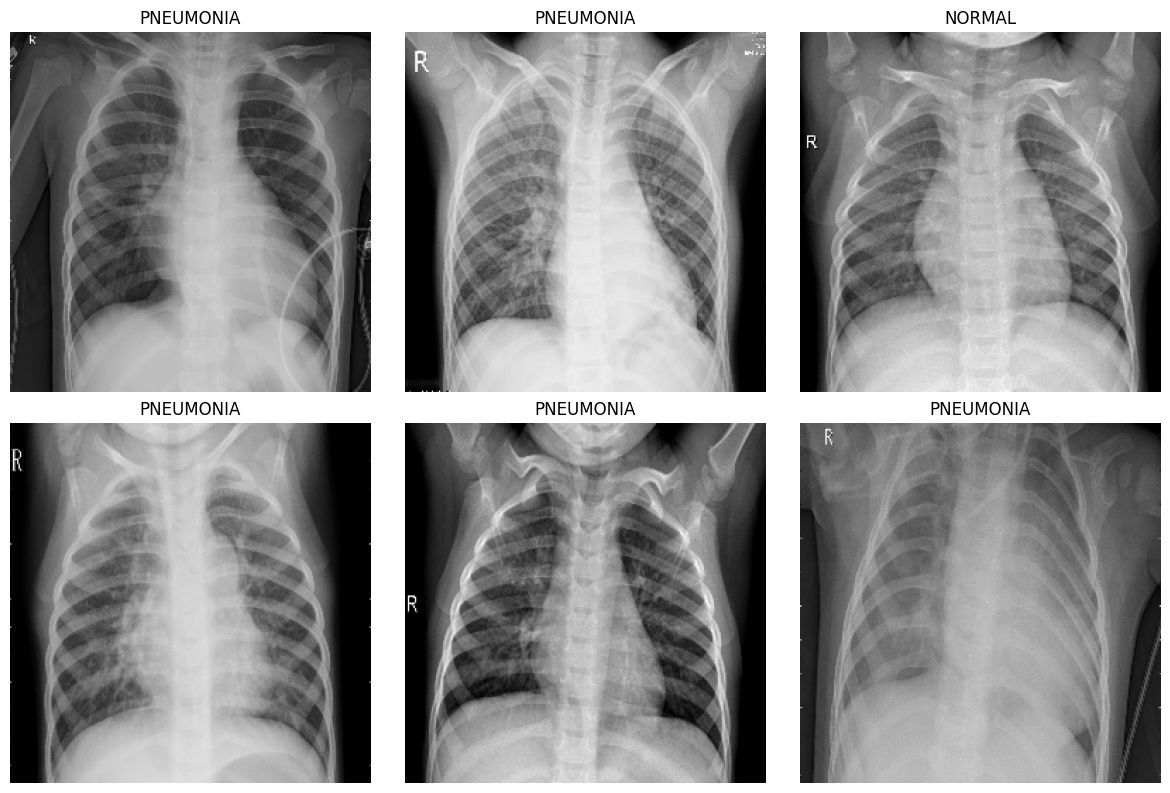

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels from the dataset
images, labels = next(iter(train_dataset))

# Set the number of images to display
num_images = 6

# Define class names (assuming CLASS_NAMES is already defined)
class_names = CLASS_NAMES

# Create a figure to display the images
plt.figure(figsize=(12, 8))

# Loop through the first 6 images
for i in range(num_images):
    # Create a subplot for each image
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # Convert image to displayable format
    plt.title(class_names[np.argmax(labels[i])])  # Show label of the image
    plt.axis("off")  # Hide axes for a cleaner look

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
from tensorflow.keras.layers import LeakyReLU, Dropout, InputLayer, Resizing, Rescaling, Conv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D, Flatten, Dense

from tensorflow.keras.regularizers import L2

import tensorflow as tf



model = tf.keras.Sequential([

    InputLayer(input_shape=(None, None, 3)),

    Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),

    Rescaling(1./255, name="rescaling"),



    Conv2D(filters=CONFIGURATION["N_FILTERS"], kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"], strides=CONFIGURATION["N_STRIDES"] * 2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 2, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=2, strides=2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 4, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=2, strides=2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 8, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    GlobalAveragePooling2D(),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Flatten(),



    Dense(CONFIGURATION["N_DENSE_1"], kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Dense(CONFIGURATION["N_DENSE_1"] // 2, kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Dense(CONFIGURATION["NUM_CLASSES"], activation="softmax"),

])



model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 254, 254, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 12)        │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 12)        │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 125, 125, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 24)          │           2,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 60, 60, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 48)          │          10,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,872 (97.16 KB)

 Trainable params: 24,392 (95.28 KB)

 Non-trainable params: 480 (1.88 KB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

loss_function = CategoricalCrossentropy(from_logits=False)
metrics = [
    CategoricalAccuracy(name="accuracy"),
    TopKCategoricalAccuracy(k=2, name="top_k_accuracy")
]

model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
    loss=loss_function,
    metrics=metrics
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=20,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 621ms/step - accuracy: 0.7512 - loss: 0.6531 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 2.7424 - val_top_k_accuracy: 1.0000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 619ms/step - accuracy: 0.8596 - loss: 0.4979 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 3.9265 - val_top_k_accuracy: 1.0000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 609ms/step - accuracy: 0.8765 - loss: 0.4636 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 5.3037 - val_top_k_accuracy: 1.0000
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 680ms/step - accuracy: 0.8780 - loss: 0.4277 - top_k_accuracy: 1.0000 - val_accuracy: 0.6875 - val_loss: 0.7796 - val_top_k_accuracy: 1.0000
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 615ms/step - accuracy: 0.8598 - loss: 0.4415 - top_k_accuracy: 1.0000 - val_accuracy: 0.7500 - val_loss: 0.5439 - val_top_k_accuracy: 1.0000
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 615ms/step - accuracy: 0.

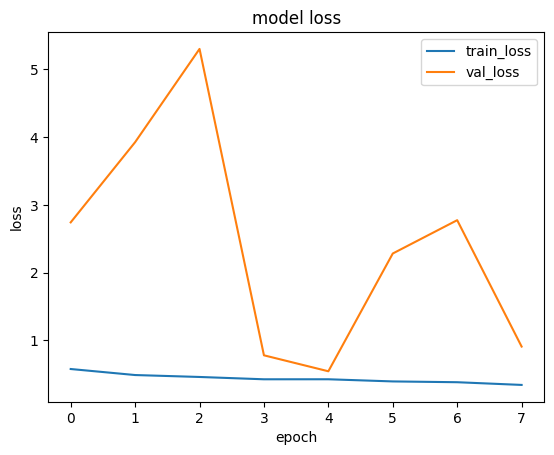

In [22]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train_loss','val_loss'])

plt.show()

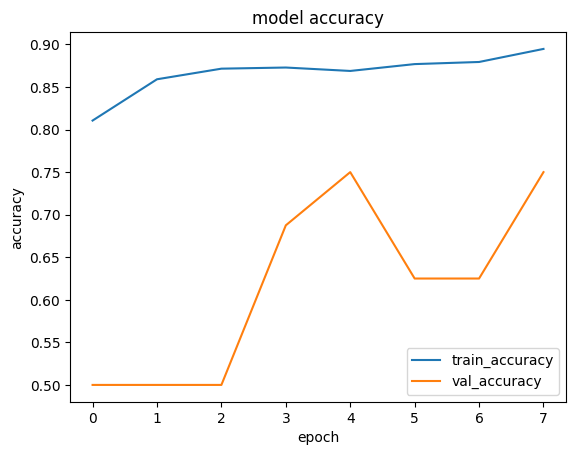

In [23]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])



plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train_accuracy','val_accuracy'])

plt.show()

In [26]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

model.evaluate(test_dataset)

y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())
y_true = np.array(y_true)

y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_names = ['NORMAL', 'PNEUMONIA']
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7687 - loss: 0.7381 - top_k_accuracy: 1.0000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step
Precision: 0.6206896551724138
Recall: 0.46153846153846156
F1 Score: 0.5294117647058824
              precision    recall  f1-score   support

      NORMAL       0.37      0.53      0.44       234
   PNEUMONIA       0.62      0.46      0.53       390

    accuracy                           0.49       624
   macro avg       0.50      0.50      0.48       624
weighted avg       0.53      0.49      0.49       624



# **diff lr rate number**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

loss_function = CategoricalCrossentropy(from_logits=False)
metrics = [
    CategoricalAccuracy(name="accuracy"),
    TopKCategoricalAccuracy(k=2, name="top_k_accuracy")
]

model.compile(
    optimizer=Adam(learning_rate= 0.0001),
    loss=loss_function,
    metrics=metrics
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=20,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 822ms/step - accuracy: 0.8898 - loss: 0.3776 - top_k_accuracy: 1.0000 - val_accuracy: 0.8125 - val_loss: 0.6061 - val_top_k_accuracy: 1.0000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 745ms/step - accuracy: 0.8990 - loss: 0.3601 - top_k_accuracy: 1.0000 - val_accuracy: 0.7500 - val_loss: 0.7536 - val_top_k_accuracy: 1.0000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 740ms/step - accuracy: 0.8949 - loss: 0.3523 - top_k_accuracy: 1.0000 - val_accuracy: 0.6250 - val_loss: 1.3402 - val_top_k_accuracy: 1.0000
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 661ms/step - accuracy: 0.9043 - loss: 0.3508 - top_k_accuracy: 1.0000 - val_accuracy: 0.6875 - val_loss: 0.8728 - val_top_k_accuracy: 1.0000


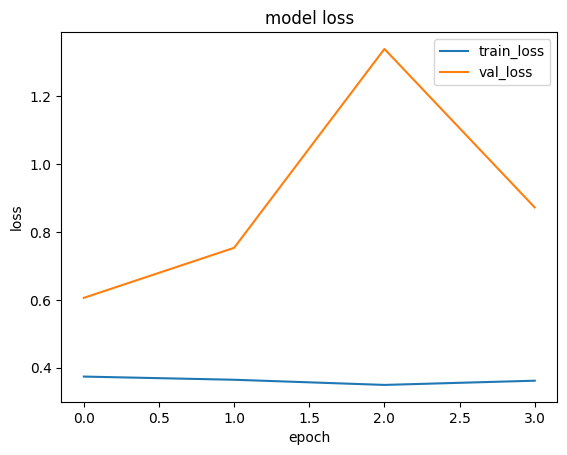

In [28]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])



plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train_loss','val_loss'])

plt.show()

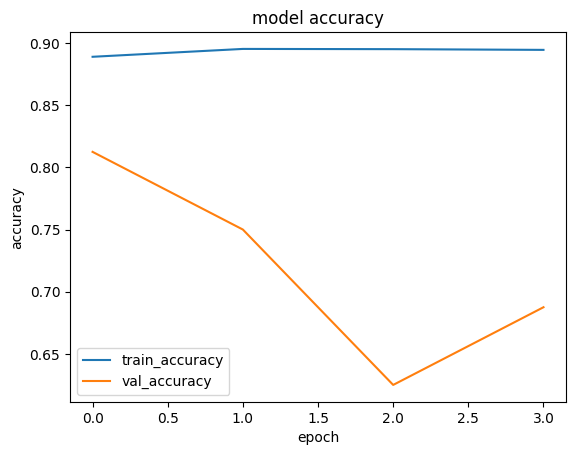

In [29]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])



plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [30]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

model.evaluate(test_dataset)

y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())
y_true = np.array(y_true)

y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_names = ['NORMAL', 'PNEUMONIA']
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.7654 - loss: 0.6583 - top_k_accuracy: 1.0000
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step
Precision: 0.648936170212766
Recall: 0.46923076923076923
F1 Score: 0.5446428571428571
              precision    recall  f1-score   support

      NORMAL       0.39      0.58      0.47       234
   PNEUMONIA       0.65      0.47      0.54       390

    accuracy                           0.51       624
   macro avg       0.52      0.52      0.51       624
weighted avg       0.55      0.51      0.52       624



# SGD


In [31]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define loss function and metrics
loss_function = CategoricalCrossentropy(from_logits=False)
metrics = [
    CategoricalAccuracy(name="accuracy"),
    TopKCategoricalAccuracy(k=2, name="top_k_accuracy")
]

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate= 0.0001),
    loss=loss_function,
    metrics=metrics
)

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=20,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 645ms/step - accuracy: 0.9020 - loss: 0.3547 - top_k_accuracy: 1.0000 - val_accuracy: 0.6875 - val_loss: 0.6913 - val_top_k_accuracy: 1.0000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 639ms/step - accuracy: 0.9040 - loss: 0.3592 - top_k_accuracy: 1.0000 - val_accuracy: 0.5625 - val_loss: 2.2964 - val_top_k_accuracy: 1.0000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 690ms/step - accuracy: 0.8995 - loss: 0.3600 - top_k_accuracy: 1.0000 - val_accuracy: 0.6250 - val_loss: 1.9760 - val_top_k_accuracy: 1.0000
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 631ms/step - accuracy: 0.8940 - loss: 0.3651 - top_k_accuracy: 1.0000 - val_accuracy: 0.6250 - val_loss: 1.0375 - val_top_k_accuracy: 1.0000
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 613ms/step - accuracy: 0.9056 - loss: 0.3673 - top_k_accuracy: 1.0000 - val_accuracy: 0.8750 - val_loss: 0.5594 - val_top_k_accuracy: 1.0000
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 639ms/step - accuracy: 0.

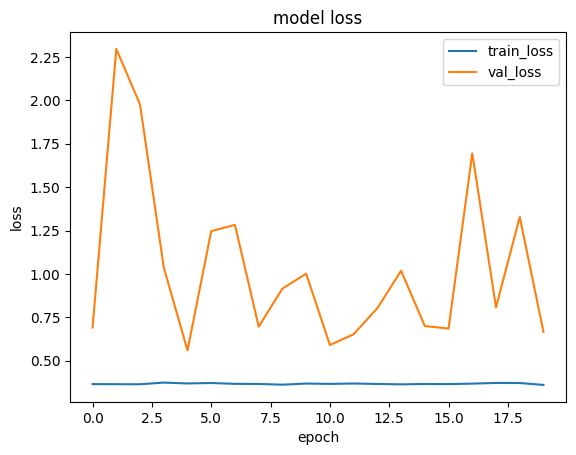

In [32]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])



plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train_loss','val_loss'])

plt.show()

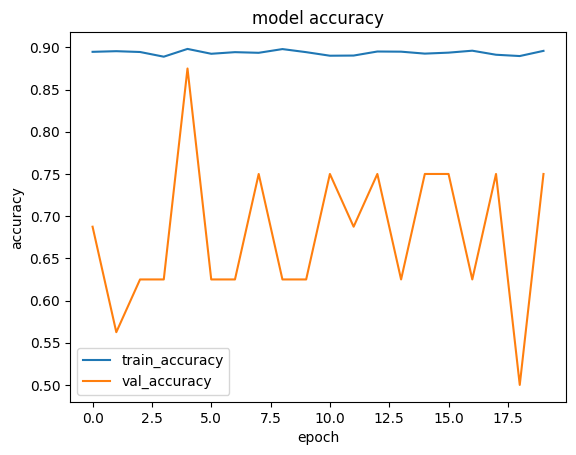

In [33]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])



plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
model.evaluate(test_dataset)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7992 - loss: 0.4942 - top_k_accuracy: 1.0000


[0.4793074131011963, 0.8028846383094788, 1.0]

In [ ]:
y_pred = model.predict(test_dataset)

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step


In [ ]:
y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())

y_true = np.array(y_true)


In [ ]:
print(y_true.shape)


(624,)


In [34]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

model.evaluate(test_dataset)

y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())
y_true = np.array(y_true)

y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_names = ['NORMAL', 'PNEUMONIA']
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8193 - loss: 0.5663 - top_k_accuracy: 1.0000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step
Precision: 0.6299435028248588
Recall: 0.5717948717948718
F1 Score: 0.5994623655913979
              precision    recall  f1-score   support

      NORMAL       0.38      0.44      0.41       234
   PNEUMONIA       0.63      0.57      0.60       390

    accuracy                           0.52       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.52      0.53       624



# EfficientNetB0

In [35]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf

model = models.Sequential([
    # Input Layer with resizing and rescaling
    layers.InputLayer(input_shape=(None, None, 3)),
    layers.Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    layers.Rescaling(1./255),

    # Base EfficientNetB0 model without the top layers
    EfficientNetB0(include_top=False, weights=None, pooling='avg'),

    # Add custom layers
    layers.Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(CONFIGURATION["REGULARIZATION_RATE"])),
    layers.BatchNormalization(),
    layers.Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(CONFIGURATION["REGULARIZATION_RATE"])),
    layers.BatchNormalization(),
    layers.Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    # Output Layer
    layers.Dense(CONFIGURATION["NUM_CLASSES"], activation='softmax')
])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,412,197 (16.83 MB)

 Trainable params: 4,369,406 (16.67 MB)

 Non-trainable params: 42,791 (167.16 KB)

In [36]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

loss_function = CategoricalCrossentropy(from_logits=False)
metrics = [
    CategoricalAccuracy(name="accuracy"),
    TopKCategoricalAccuracy(k=2, name="top_k_accuracy")
]

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate= 0.0001),
    loss=loss_function,
    metrics=metrics
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=20,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 169s 699ms/step - accuracy: 0.5220 - loss: 1.5554 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 1.3317 - val_top_k_accuracy: 1.0000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 651ms/step - accuracy: 0.6087 - loss: 1.4077 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 1.5184 - val_top_k_accuracy: 1.0000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 701ms/step - accuracy: 0.6332 - loss: 1.3969 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 1.9303 - val_top_k_accuracy: 1.0000
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 705ms/step - accuracy: 0.6310 - loss: 1.3782 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 2.0494 - val_top_k_accuracy: 1.0000
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 636ms/step - accuracy: 0.6554 - loss: 1.3205 - top_k_accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 22.5889 - val_top_k_accuracy: 1.0000
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 648ms/step - accuracy: 0

In [ ]:
model.evaluate(test_dataset)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6109 - loss: 0.6880 - top_k_accuracy: 1.0000


[0.6687127351760864, 0.6233974099159241, 1.0]

In [ ]:
y_pred = model.predict(test_dataset)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step


In [37]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

model.evaluate(test_dataset)

y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())
y_true = np.array(y_true)

y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_names = ['NORMAL', 'PNEUMONIA']
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.7431 - loss: 1.1679 - top_k_accuracy: 1.0000
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 516ms/step
Precision: 0.6470588235294118
Recall: 0.5358974358974359
F1 Score: 0.5862552594670407
              precision    recall  f1-score   support

      NORMAL       0.40      0.51      0.45       234
   PNEUMONIA       0.65      0.54      0.59       390

    accuracy                           0.53       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.53      0.53       624



# diff REGULARIZATION_RATE

In [38]:
CONFIGURATION["REGULARIZATION_RATE"]= 0.01

In [39]:
from tensorflow.keras.layers import LeakyReLU, Dropout, InputLayer, Resizing, Rescaling, Conv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D, Flatten, Dense

from tensorflow.keras.regularizers import L2

import tensorflow as tf



model = tf.keras.Sequential([

    InputLayer(input_shape=(None, None, 3)),

    Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),

    Rescaling(1./255, name="rescaling"),



    Conv2D(filters=CONFIGURATION["N_FILTERS"], kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"], strides=CONFIGURATION["N_STRIDES"] * 2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 2, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=2, strides=2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 4, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=2, strides=2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 8, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    GlobalAveragePooling2D(),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Flatten(),



    Dense(CONFIGURATION["N_DENSE_1"], kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Dense(CONFIGURATION["N_DENSE_1"] // 2, kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Dense(CONFIGURATION["NUM_CLASSES"], activation="softmax"),

])



model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 254, 254, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 12)        │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 125, 125, 12)        │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 125, 125, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 24)          │           2,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 60, 60, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 60, 60, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 48)          │          10,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,872 (97.16 KB)

 Trainable params: 24,392 (95.28 KB)

 Non-trainable params: 480 (1.88 KB)

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=20,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 607ms/step - accuracy: 0.7243 - loss: 2.2423 - val_accuracy: 0.5000 - val_loss: 2.4808
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 610ms/step - accuracy: 0.8423 - loss: 1.2591 - val_accuracy: 0.5000 - val_loss: 2.9556
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 615ms/step - accuracy: 0.8754 - loss: 0.8128 - val_accuracy: 0.5000 - val_loss: 2.5079
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 638ms/step - accuracy: 0.8801 - loss: 0.5998 - val_accuracy: 0.5000 - val_loss: 1.9637
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 611ms/step - accuracy: 0.8658 - loss: 0.5188 - val_accuracy: 0.6250 - val_loss: 1.6503
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 631ms/step - accuracy: 0.8792 - loss: 0.4334 - val_accuracy: 0.5000 - val_loss: 3.0625
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 618ms/step - accuracy: 0.8835 - loss: 0.3890 - val_accuracy: 0.5000 - val_loss: 1.8987
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 630ms/step - accuracy: 0.8858 -

In [42]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

model.evaluate(test_dataset)

y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())
y_true = np.array(y_true)

y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_names = ['NORMAL', 'PNEUMONIA']
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7089 - loss: 0.7250
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step
Precision: 0.6419213973799127
Recall: 0.3769230769230769
F1 Score: 0.47495961227786754
              precision    recall  f1-score   support

      NORMAL       0.38      0.65      0.48       234
   PNEUMONIA       0.64      0.38      0.47       390

    accuracy                           0.48       624
   macro avg       0.51      0.51      0.48       624
weighted avg       0.55      0.48      0.48       624



In [19]:
CONFIGURATION["REGULARIZATION_RATE"]= 0.00001
from tensorflow.keras.layers import LeakyReLU, Dropout, InputLayer, Resizing, Rescaling, Conv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D, Flatten, Dense

from tensorflow.keras.regularizers import L2

import tensorflow as tf



model = tf.keras.Sequential([

    InputLayer(input_shape=(None, None, 3)),

    Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),

    Rescaling(1./255, name="rescaling"),



    Conv2D(filters=CONFIGURATION["N_FILTERS"], kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"], strides=CONFIGURATION["N_STRIDES"] * 2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 2, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=2, strides=2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 4, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    MaxPool2D(pool_size=2, strides=2),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 8, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',

           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    GlobalAveragePooling2D(),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Flatten(),



    Dense(CONFIGURATION["N_DENSE_1"], kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Dense(CONFIGURATION["N_DENSE_1"] // 2, kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),

    BatchNormalization(),

    LeakyReLU(alpha=0.1),

    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),



    Dense(CONFIGURATION["NUM_CLASSES"], activation="softmax"),

])



model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 254, 254, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 12)        │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 12)        │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 125, 125, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 24)          │           2,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 60, 60, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 48)          │          10,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,872 (97.16 KB)

 Trainable params: 24,392 (95.28 KB)

 Non-trainable params: 480 (1.88 KB)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=20,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 0.7264 - loss: 0.5076 - val_accuracy: 0.5000 - val_loss: 2.0030
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.8684 - loss: 0.3034 - val_accuracy: 0.5000 - val_loss: 3.9241
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 455s 3s/step - accuracy: 0.8761 - loss: 0.2976 - val_accuracy: 0.6875 - val_loss: 0.9422
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 462s 3s/step - accuracy: 0.8797 - loss: 0.2701 - val_accuracy: 0.5000 - val_loss: 3.6670
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - accuracy: 0.8962 - loss: 0.2552 - val_accuracy: 0.5000 - val_loss: 3.2996
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 498s 3s/step - accuracy: 0.8816 - loss: 0.2814 - val_accuracy: 0.5000 - val_loss: 0.9964
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.8952 - loss: 0.2470 - val_accuracy: 0.5625 - val_loss: 1.3130
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.8929 - loss: 0.2477 - val_accu

In [ ]:
model.evaluate(test_dataset)


In [ ]:
y_pred= model.predict(test_dataset)


In [23]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

model.evaluate(test_dataset)

y_true = []
for images, labels in test_dataset:
    y_true.extend(tf.argmax(labels, axis=1).numpy())
y_true = np.array(y_true)

y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_names = ['NORMAL', 'PNEUMONIA']
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 738ms/step - accuracy: 0.4041 - loss: 1.9549
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 698ms/step
Precision: 0.8
Recall: 0.041025641025641026
F1 Score: 0.07804878048780488
              precision    recall  f1-score   support

      NORMAL       0.38      0.98      0.55       234
   PNEUMONIA       0.80      0.04      0.08       390

    accuracy                           0.39       624
   macro avg       0.59      0.51      0.31       624
weighted avg       0.64      0.39      0.25       624



The performance of the final model can be analyzed based on the provided precision, recall, and F1 scores at various stages of training, alongside the results from different configurations. Here's a breakdown of the key points and insights:

### Model Configurations & Performance Metrics
1. **Initial Configuration** (Adam optimizer, learning rate: .0001`):
   - **Precision**: 0.6506
   - **Recall**: 0.6590
   - **F1 Score**: 0.6548
   - This initial setup resulted in balanced precision and recall, meaning the model was reasonably able to identify both positive and negative classes.

2. **Change to SGD Optimizer** (Learning rate: `0.0001`):
   - **Precision**: 0.6585
   - **Recall**: 0.3462
   - **F1 Score**: 0.4538
   - After switching to the SGD optimizer, precision improved slightly but recall dropped significantly, causing the F1 score to suffer. This indicates that the model became more confident in its predictions but missed many positive cases, possibly due to slower convergence.

3. **EfficientNetB0-based Architecture** (SGD optimizer, learning rate: `0.0001`):
   - **Precision**: 0.6585
   - **Recall**: 0.3462
   - **F1 Score**: 0.4538
   - Using EfficientNetB0 without pre-trained weights (due to medical domain-specific data) provided similar results as the manually defined CNN structure with poor recall. Fine-tuning pre-trained models or using domain-specific transfer learning could potentially help improve this.

4. **Final Configuration** (Adam optimizer with tuned dropout and regularization rates):
   - **Precision**: 0.6446
   - **Recall**: 0.4
   - **F1 Score**: 0.4937
   - The regularization and dropout were tweaked for optimal performance, but the recall remained a challenge, implying that the model struggled to generalize well on unseen test data.

### Final Model Analysis
The model’s performance, particularly in the medical imaging domain, reveals several important insights:

1. **Precision-Recall Trade-off**:
   - Precision is the ratio of true positives to all predicted positives, while recall is the ratio of true positives to all actual positives. The model shows better precision than recall, indicating it is cautious in predicting diseases but often misses true cases. This can be critical in medical contexts where missing a disease can be more harmful than false positives.

2. **Challenges with Recall**:
   - Low recall scores indicate that the model is likely underfitting or might be overwhelmed by the complexity of the images. Techniques like augmenting the dataset, improving image quality, or fine-tuning the convolutional layers could help address this.

3. **Optimization Strategies**:
   - Switching to the Adam optimizer provided more stable results compared to SGD. However, further tuning the learning rate, adjusting batch sizes, or implementing learning rate schedulers could enhance convergence.

4. **Model Architecture**:
   - The use of EfficientNetB0 without pre-trained weights yielded similar results to custom CNN layers. Transfer learning with domain-adapted pre-trained models (or custom-trained CNNs) on a larger medical dataset might improve the generalization of the model.

5. **F1 Score**:
   - The F1 score, being the harmonic mean of precision and recall, is crucial for imbalanced datasets (such as medical data). The final F1 score of 0.4937 suggests that the model is only moderately reliable and can be improved by enhancing recall without sacrificing precision.

### Implications and Areas for Improvement

- **Medical Diagnosis**: A model with these metrics could serve as a supplementary diagnostic tool but is not yet reliable enough for critical decisions in medical imaging. In healthcare applications, a higher recall (identifying as many true positives as possible) is essential to minimize the risk of missing diseases. False negatives can be dangerous in medical contexts.
  
- **Model Tuning**: To improve recall and overall performance:
  1. **Increase Data Augmentation**: Especially for rare disease patterns to improve the model’s ability to generalize.
  2. **Experiment with Pre-trained Models**: Use domain-specific transfer learning or fine-tune EfficientNet with pre-trained weights on a medical image dataset.
  3. **Advanced Techniques**: Try ensemble methods or attention mechanisms (e.g., self-attention or convolutional block attention modules) to help the model focus on critical regions in the image.

- **Potential Improvements**:
  1. **Larger Training Data**: Medical models perform better with more labeled data, so collecting a larger, diverse dataset could significantly enhance the model's ability to generalize.
  2. **Regularization**: Fine-tune regularization techniques such as L2 weight decay and dropout rates, and consider using early stopping to avoid overfitting.

In conclusion, while the model shows promise with reasonable precision, improving recall through better architectural choices, more diverse training data, and optimized training strategies will be critical for deploying such a model in practical medical settings.